## Assignment 8 (20 marks)

### Deadline: 11/15 11:59 pm

### Sorting

### Reminders
1. Download the Assignment_8.ipynb file and you can start coding inside that file.
2. Before your final submission, rename your submission by adding your surname at the front such that it becomes Surname_Assignment_8.ipynb.

### Problem 1 (6 marks)

The naive implementation of **Bubble Sort** takes $O(n^2)$ time to sort an array of $n$ elements, for both worst-case and best-case scenarios. Create a function `smart_bubblesort(arr)` that will take an array-list as its input and work exactly following the logic of a **Bubble Sort** but in the best-case scenario its time complexity should be $O(n)$ i.e., if the input to `smart_bubblesort(arr)` is an already sorted array-list (best-case scenario), then the code should run in linear time. Run the following ___Test Case___ which will plot the execution time for `smart_bubblesort(arr)` for both the best-case and worst-case scenarios simulataneously. If you have correctly implemented `smart_bubblesort(arr)` you will observe a linear plot for the best-case and a quadratic plot for the worst-case.

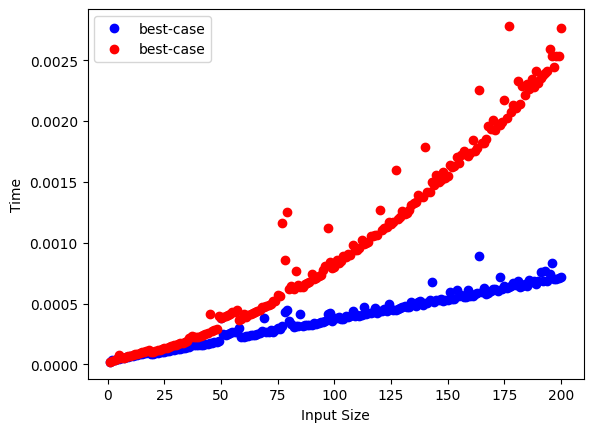

In [3]:
# Test Case

import timeit
import random
import numpy as np
import matplotlib.pyplot as plt

N = 200
x = np.linspace(1,N,N,dtype=int)

y = []
z = []

for i in range(N):
    arr = []
    for j in range(i):
        arr.append(j)
    comp_time = timeit.timeit('smart_bubblesort(arr)', number=100, globals=globals())
    y.append(comp_time)
    arr.reverse()
    comp_time_rev = timeit.timeit('smart_bubblesort(arr)', number=100, globals=globals())
    z.append(comp_time_rev)

plt.plot(x, y, 'ob', label='best-case')
plt.plot(x, z, 'or', label='best-case')
plt.ylabel('Time')
plt.xlabel('Input Size')
plt.legend()
plt.show()

In [2]:
def smart_bubblesort(arr):
    n = len(arr)
    comparisons = 0
    swaps = 0
    is_sorted = True 

    for i in range(n):
        for j in range(0, n-i-1):
            comparisons += 1
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swaps += 1
                is_sorted = False

        if is_sorted:
            break

    return comparisons, swaps

### Problem 2 (6 marks)

In our previous class, we had discussed **Selection Sort** from the perspective of finding the smallest element at every pass and putting them in their correct position i.e., the smallest element goes to the 1st position of the array, the second smallest element goes to the 2nd position, and so on.

Now, create a function `selectionsort(arr)` where at every pass we identify the largest element and put it in its rightful place. After you have created your function, test `selectionsort(arr)` on an array of 10 elements where the elements are generated randomly using the `random` module. Your output should look like this:

`Original Array:  [62, 32, 54, 81, 32, 89, 72, 59, 75, 2]
Sorted Array: [2, 32, 32, 54, 59, 62, 72, 75, 81, 89]`

In [4]:
def selectionsort(arr):
    n = len(arr)

    for i in range(n-1, 0, -1):
        max_index = 0

        for j in range(1, i+1):
            if arr[j] > arr[max_index]:
                max_index = j
                
        arr[i], arr[max_index] = arr[max_index], arr[i]

### Problem 3 (8 marks)

The traditional **Merge Sort** is not an in-place algorithm since at every recursive call we subdivide the array, we store the elements into two new subarrays of half the size and merge them. Complete the following **Merge Sort** code by creating a `merge_inplace()` function which will perform our **Merge Sort** in-place i.e., we will not create separate subarrays to merge at every recursive calls. All the merging should happen in-place. After you are done completing `merge_inplace()`, run `mergesort(arr, 0, len(arr)-1)` to show the step-by-step sorting of an array generated using random numbers. Your output should look like this:

`In-place Merge Sort:
[21, 14, 86, 40, 35, 31, 77]
[21, 14, 86, 40, 35, 31, 77]
[21, 14, 86, 40, 35, 31, 77]
[14, 21, 86, 40, 35, 31, 77]
[14, 21, 86, 40, 35, 31, 77]
[14, 21, 86, 40, 35, 31, 77]
[14, 21, 40, 86, 35, 31, 77]
[14, 21, 40, 86, 35, 31, 77]
[14, 21, 40, 86, 35, 31, 77]
[14, 21, 40, 86, 35, 31, 77]
[14, 21, 40, 86, 31, 35, 77]
[14, 21, 40, 86, 31, 35, 77]
[14, 21, 40, 86, 31, 35, 77]
[14, 21, 31, 35, 40, 77, 86]`

In [5]:
def mergesort(arr, l, r):
    if (l < r):
        m = l + (r - l) // 2
        mergesort(arr, l, m)
        mergesort(arr, m + 1, r)
        merge_inplace(arr, l, m, r)
    print(arr)

def merge_inplace(arr, start, mid, end):
    left_size = mid - start + 1
    right_size = end - mid

    left_temp = [0] * left_size
    right_temp = [0] * right_size

    for i in range(left_size):
        left_temp[i] = arr[start + i]
    for j in range(right_size):
        right_temp[j] = arr[mid + 1 + j]

    i = j = 0
    k = start

    while i < left_size and j < right_size:
        if left_temp[i] <= right_temp[j]:
            arr[k] = left_temp[i]
            i += 1
        else:
            arr[k] = right_temp[j]
            j += 1
        k += 1

    while i < left_size:
        arr[k] = left_temp[i]
        i += 1
        k += 1

    while j < right_size:
        arr[k] = right_temp[j]
        j += 1
        k += 1